# 数据洞察报告：探究高中生数学成绩与个人背景状况之间的联系

## 任务目标：

在教育领域，学生的学业成绩可能与其个人成长的多种因素息息相关。因此，欲了解如何有效提升学生的学业表现，单纯依赖死读书的方法显然不足以达到理想效果。相反，我们应该根据学生全方位的成长情况，精心设计个性化的教育方案，以更全面、科学的方式促进其发展。这样的教育策略更有望为学生成绩提供有针对性的提升，为其未来的学业和个人发展打下坚实基础。

本项目基于采集的学校报告和问卷调查数据，涵盖学生成绩、人口统计学信息、社交状况、家庭背景以及学校相关特征。通过对这一多维度数据集的深入分析，旨在全面了解学生表现与其背后的多方面因素之间的关联，进而为个性化教育、学校管理和家庭支持提供科学依据。

## 研究方法

数据摘要：查看数据的摘要统计信息，包括均值、中位数、标准差等，以获取数据的整体印象。

单变量分析：对单个变量进行分析，包括直方图、箱线图等，以了解变量的分布和统计特性。

双变量和多变量分析：探索变量之间的关系，可以使用散点图等来查看变量之间的相关性。

可视化工具：使用图表和图形工具（如numpy、matplotlib库等），以便更直观地展示数据的特征。

机器学习模型：利用线性回归模型，对已有数据进行挖掘训练，从而预测最终的考试结果。

## 关于数据集：
此数据集包含两所葡萄牙高中学生的数学成绩数据。这些数据是通过学校报告和问卷收集的。数据已经过清洗。


数据集来源：https://www.kaggle.com/datasets/dillonmyrick/high-school-student-performance-and-demographics

## 数据集的属性如下：

school - student's school (binary: "GP" - Gabriel Pereira or "MS" - Mousinho da Silveira)

sex - student's sex (binary: "F" - female or "M" - male)

age - student's age (numeric: from 15 to 22)

address_type - student's home address type (binary: "Urban" or "Rural")

family_size - family size (binary: "Less or equal to 3" or "Greater than 3")

parent_status - parent's cohabitation status (binary: "Living together" or "Apart")

mother_education - mother's education (ordinal: "none", "primary education (4th grade)", "5th to 9th grade", "secondary education" or "higher education")

father_education - father's education (ordinal: "none", "primary education (4th grade)", "5th to 9th grade", "secondary education" or "higher education")

mother_job - mother's job (nominal: "teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or "other")

father_job - father's job (nominal: "teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or "other")

reason - reason to choose this school (nominal: close to "home", school "reputation", "course" preference or "other")

guardian - student's guardian (nominal: "mother", "father" or "other")

travel_time - home to school travel time (ordinal: "<15 min.", "15 to 30 min.", "30 min. to 1 hour", or 4 - ">1 hour")

study_time - weekly study time (ordinal: 1 - "<2 hours", "2 to 5 hours", "5 to 10 hours", or ">10 hours")

class_failures - number of past class failures (numeric: n if 1<=n<3, else 4)

school_support - extra educational support (binary: yes or no)

family_support - family educational support (binary: yes or no)

extra_paid_classes - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)

activities - extra-curricular activities (binary: yes or no)

nursery - attended nursery school (binary: yes or no)

higher_ed - wants to take higher education (binary: yes or no)

internet - Internet access at home (binary: yes or no)

romantic_relationship - with a romantic relationship (binary: yes or no)

family_relationship - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)

free_time - free time after school (numeric: from 1 - very low to 5 - very high)

social - going out with friends (numeric: from 1 - very low to 5 - very high)

weekday_alcohol - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)

weekend_alcohol - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)

health - current health status (numeric: from 1 - very bad to 5 - very good)

absences - number of school absences (numeric: from 0 to 93)

grade_1 - first period grade (numeric: from 0 to 20)

grade_2 - second period grade (numeric: from 0 to 20)

final_grade - final grade (numeric: from 0 to 20, output target)

## 0、读取数据+数据预处理

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mp
import matplotlib.pyplot as plt
import os
        
df=pd.read_csv("student_math_clean.csv")

### 展示数据

In [2]:
df

,student_id,school,sex,age,address_type,family_size,parent_status,mother_education,father_education,mother_job,...,family_relationship,free_time,social,weekday_alcohol,weekend_alcohol,health,absences,grade_1,grade_2,final_grade
0,1,GP,F,18,Urban,Greater than 3,Apart,higher education,higher education,at_home,...,4,3,4,1,1,3,6,5,6,6
1,2,GP,F,17,Urban,Greater than 3,Living together,primary education (4th grade),primary education (4th grade),at_home,...,5,3,3,1,1,3,4,5,5,6
2,3,GP,F,15,Urban,Less than or equal to 3,Living together,primary education (4th grade),primary education (4th grade),at_home,...,4,3,2,2,3,3,10,7,8,10
3,4,GP,F,15,Urban,Greater than 3,Living together,higher education,5th to 9th grade,health,...,3,2,2,1,1,5,2,15,14,15
4,5,GP,F,16,Urban,Greater than 3,Living together,secondary education,secondary education,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,391,MS,M,20,Urban,Less than or equal to 3,Apart,5th to 9th grade,5th to 9th grade,services,...,5,5,4,4,5,4,11,9,9,9
391,392,MS,M,17,Urban,Less than or equal to 3,Living together,secondary education,primary education (4th grade),services,...,2,4,5,3,4,2,3,14,16,16
392,393,MS,M,21,Rural,Greater than 3,Living together,primary education (4th grade),primary education (4th grade),other,...,5,5,3,3,3,3,3,10,8,7
393,394,MS,M,18,Rural,Less than or equal to 3,Living together,secondary education,5th to 9th grade,services,...,4,4,1,3,4,5,0,11,12,10


### 展示数据类型

In [3]:
df.dtypes

student_id                int64
school                   object
sex                      object
age                       int64
address_type             object
family_size              object
parent_status            object
mother_education         object
father_education         object
mother_job               object
father_job               object
school_choice_reason     object
guardian                 object
travel_time              object
study_time               object
class_failures            int64
school_support           object
family_support           object
extra_paid_classes       object
activities               object
nursery_school           object
higher_ed                object
internet_access          object
romantic_relationship    object
family_relationship       int64
free_time                 int64
social                    int64
weekday_alcohol           int64
weekend_alcohol           int64
health                    int64
absences                  int64
grade_1 

### 对数据进行基本的分析，包括计算期望、方差、最小值、最大值、分位数等

In [4]:
df.describe().style.background_gradient()

,student_id,age,class_failures,family_relationship,free_time,social,weekday_alcohol,weekend_alcohol,health,absences,grade_1,grade_2,final_grade
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,198.000000,16.696203,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,114.170924,1.276043,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,1.000000,15.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,99.500000,16.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,198.000000,17.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,296.500000,18.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,395.000000,22.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


## 1、高中生数学成绩与性别之间的联系

### 将数据以性别分成两组

In [5]:
df_female=df[df["sex"]=='F']
df_male=df[df["sex"]=='M']

### 计算女高中生数学成绩的期望以及分位数

In [6]:
df_female1=df_female['final_grade']
print("期望：",df_female1.mean())
print("25%分位数：",df_female1.quantile(0.25))
print("50%分位数：",df_female1.quantile(0.5))
print("75%分位数：",df_female1.quantile(0.75))

期望： 9.966346153846153
25%分位数： 8.0
50%分位数： 10.0
75%分位数： 13.0


### 画出女高中生数学成绩的箱图

<Axes: >

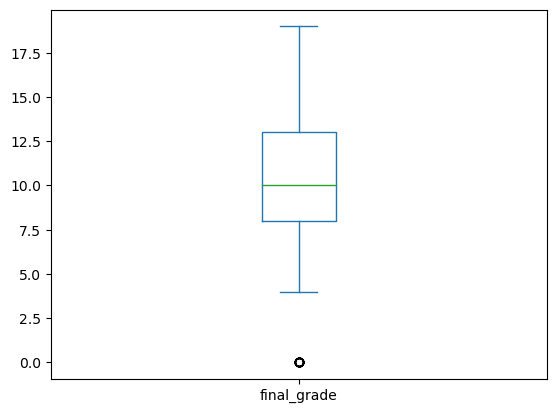

In [7]:
df_female1.plot.box()

### 计算男高中生数学成绩的期望以及分位数

In [8]:
df_male1=df_male['final_grade']
print("期望：",df_male1.mean())
print("25%分位数：",df_male1.quantile(0.25))
print("50%分位数：",df_male1.quantile(0.5))
print("75%分位数：",df_male1.quantile(0.75))

期望： 10.914438502673796
25%分位数： 9.0
50%分位数： 11.0
75%分位数： 14.0


### 画出男高中生数学成绩的箱图

<Axes: >

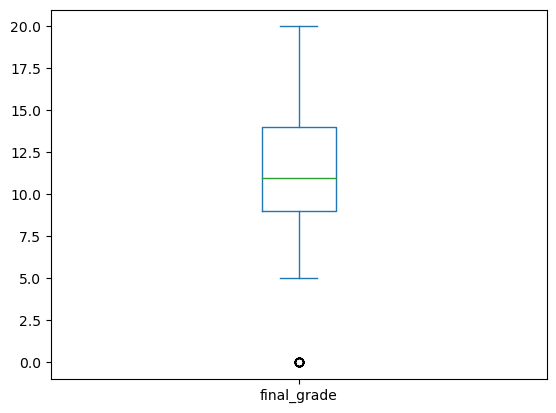

In [9]:
df_male1.plot.box()

男高中生的期望成绩略高于女高中生。

男高中生在所有分位数上的数学成绩都略高于女高中生，表明该学校男生整体上在数学上的表现相对更好。

差异原因：性别差异可能受到多种因素的影响，包括生理构造、激素差异、社会文化、教育制度、兴趣和个体学习能力等。因此，我们不能由此推断出男生的数学成绩一定比女生好这一结论。
            

## 2、高中生数学成绩与年龄之间的联系

#### 画出散点图

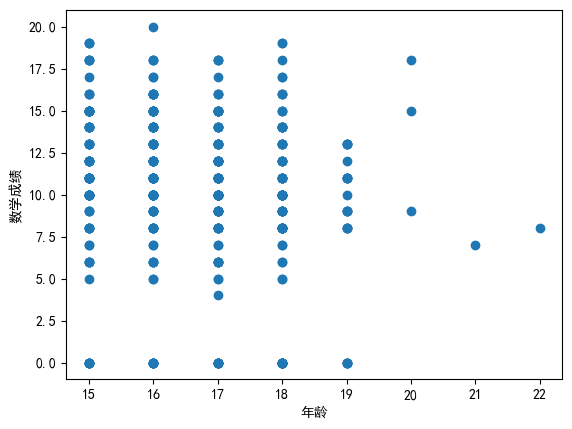

In [10]:
x=df.age
y=df.final_grade
# 正确显示中文和负号
plt.rcParams["font.sans-serif"] = ["SimHei"]
plt.rcParams["axes.unicode_minus"] = False
# 设置x、y轴标签名
plt.xlabel("年龄")
plt.ylabel("数学成绩")

plt.scatter(x,y)
plt.show()

由此可见，高中生的数学成绩与年龄没有线性关系。我们知道，高中生的年龄一般在15-18岁之间，图中年龄越大的学生在成绩上的表现越差于年轻的学生，可能是因为他们是留级生而导致的必然结果。

## 3、高中生数学成绩与旅游时间、学习时间之间的联系

In [11]:
import matplotlib.pyplot as plt
import numpy as np

categories = ['<15 min','15 to 30 min','30 min. to 1 hour','>1 hour']
#values = df['travel_time'].value_counts()
values=df.groupby('travel_time')['final_grade'].agg([ 'sum'])
values

,sum
travel_time,
15 to 30 min.,1060
30 min. to 1 hour,213
<15 min.,2771
>1 hour,70


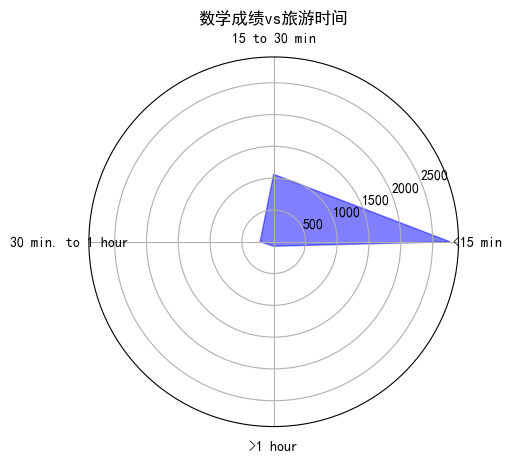

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# 数据准备
categories = ['<15 min','15 to 30 min','30 min. to 1 hour','>1 hour']
values = [2771, 1060, 213,70]

# 计算角度
num_categories = len(categories)
theta = np.linspace(0, 2 * np.pi, num_categories, endpoint=False)

# 将第一个数据点重复添加到末尾，以闭合雷达图
values += values[:1]
theta = np.append(theta, theta[:1])

# 创建雷达图
fig, ax = plt.subplots(subplot_kw=dict(polar=True))
ax.fill(theta, values, color='b', alpha=0.5)

# 添加标签
ax.set_xticks(theta[:-1])
ax.set_xticklabels(categories)

# 显示雷达图
plt.title('数学成绩vs旅游时间')
plt.show()


数学成绩随着旅游时间的增长而明显降低，这似乎是个有趣的结论。看来，一份努力一份收获并不是说教，而是有数据支撑的。

In [13]:
import matplotlib.pyplot as plt
import numpy as np

categories = ['<2 hours','2 to 5 hours','5 to 10 hours','>10 hours']
values=df.groupby('study_time')['final_grade'].agg([ 'sum'])
values


,sum
study_time,
2 to 5 hours,2014
5 to 10 hours,741
<2 hours,1055
>10 hours,304


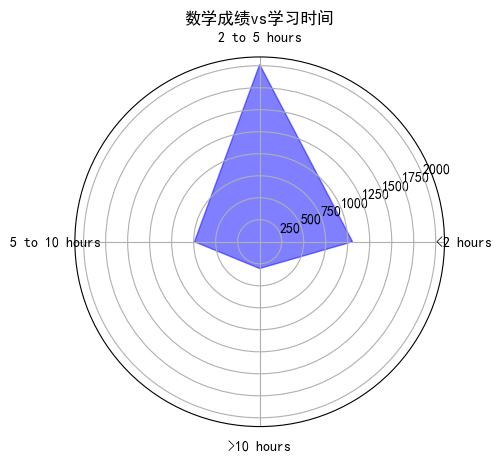

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# 数据准备
categories = ['<2 hours','2 to 5 hours','5 to 10 hours','>10 hours']
values = [1055,2014,741,304]

# 计算角度
num_categories = len(categories)
theta = np.linspace(0, 2 * np.pi, num_categories, endpoint=False)

# 将第一个数据点重复添加到末尾，以闭合雷达图
values += values[:1]
theta = np.append(theta, theta[:1])

# 创建雷达图
fig, ax = plt.subplots(subplot_kw=dict(polar=True))
ax.fill(theta, values, color='b', alpha=0.5)

# 添加标签
ax.set_xticks(theta[:-1])
ax.set_xticklabels(categories)

# 显示雷达图
plt.title('数学成绩vs学习时间')
plt.show()


按照上文的推论，难道说竭力减少休息时间，增加学习时间，成绩就会得到显著提升吗？也不尽然。本图清晰地向我们揭示了，并不是学习时间越长，取得的结果就越好。反之，学习时间大于十小时的同学，数学成绩处于最低谷。这一方面有可能是因为他们本身数学就不好，因此投入了大量的时间精力；另一方面也有可能是由于学校和家庭的压力，被迫学习很久，但其实效率并不高。与此同时，过久的学习也容易伤害身心，对孩子的长远发展并无好处。

## 4、高中生数学成绩与缺席次数之间的联系

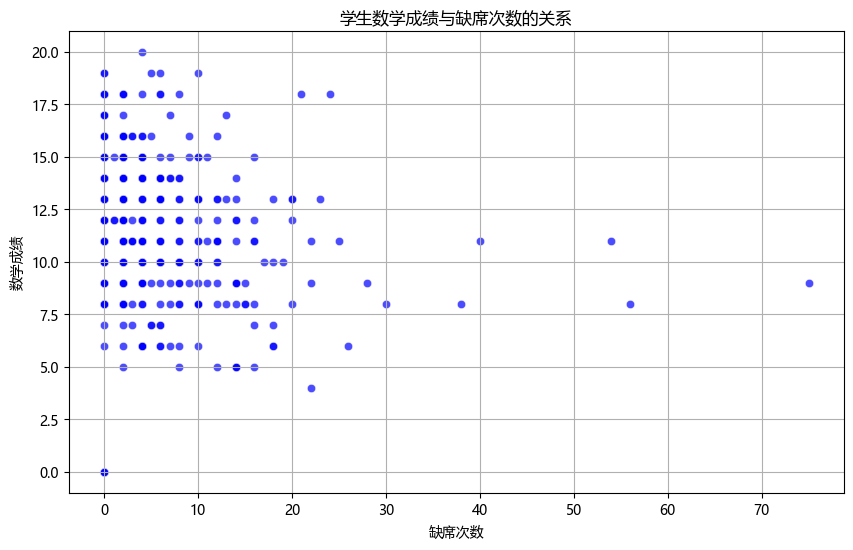

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 设置字体
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei'] 
plt.rcParams['axes.unicode_minus'] = False 


math_scores = df['final_grade']
absence = df['absences']
num_students=395


# 绘制散点图
plt.figure(figsize=(10, 6))
sns.scatterplot(x=absence, y=math_scores, color='blue', alpha=0.7)
plt.title('学生数学成绩与缺席次数的关系')
plt.xlabel('缺席次数')
plt.ylabel('数学成绩')
plt.grid(True)
plt.show()


“我要翘课，回家自学”。这似乎可以看作是新时代学生的“自律宣言”。然而，其真实性和有效性还有待考证。根据这张散点图来看，数学成绩较高的点都集中在表的左侧，也就是缺席次数较少的一侧。这提醒我们有时候也不要对自己的能力太过盲目自信。自己在家毫无方法地看十页书，不如课上听老师精辟地总结几句话。本图也揭示了学校教育对学生的重要性。由此看来，数学学习的百分之七八十重点都在课堂。只有认真上课，才有机会取得好成绩。

## 5、根据两次阶段考成绩预测期末成绩

In [16]:
# 导入所需的库
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# X是两次阶段考成绩，y是期末成绩）
df_usual=df[['grade_1','grade_2']]
df_final=df['final_grade']

In [17]:
X = np.array(df_usual)
y = np.array(df_final)

系数:  [0.09723061 1.01463373]
截距:  -1.419700437737884


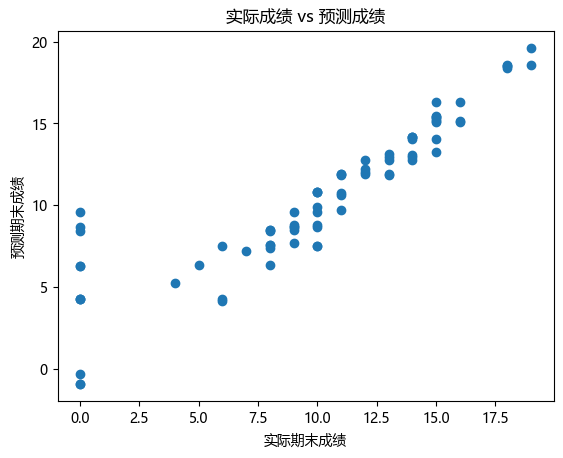

均方误差:  5.442606991180928
平均绝对误差:  1.3063194697506244


In [18]:
# 设置字体
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei'] 
plt.rcParams['axes.unicode_minus'] = False 

# 划分数据集为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# 创建线性回归模型
lr= LinearRegression()

# 训练模型
lr.fit(X_train, y_train)

# 预测测试集
y_pred = lr.predict(X_test)

# 输出模型参数
print('系数: ', lr.coef_)
print('截距: ', lr.intercept_)

# 画出预测结果与实际值的对比图
plt.scatter(y_test, y_pred)
plt.xlabel("实际期末成绩")
plt.ylabel("预测期末成绩")
plt.title("实际成绩 vs 预测成绩")
plt.show()

# 输出模型性能评估指标
print('均方误差: ', metrics.mean_squared_error(y_test, y_pred))
print('平均绝对误差: ', metrics.mean_absolute_error(y_test, y_pred))



In [19]:
#模型在训练集上的性能
lr.score(X_train,y_train)

0.8275554421003004

In [20]:
#模型在测试集上的性能
lr.score(X_test,y_test)

0.8027243833155605

数据表明，该模型在训练集和测试集的拟合效果相对较好，测试集的精度低于训练集，有可能是过拟合。

通过观察学生两次阶段考试成绩并应用线性回归模型，可以发现该模型对学生期末成绩的预测表现相当良好。这意味着教师在阶段考试结束后有能力及时识别学生的学术差距，并有针对性地提供支持和辅导，以帮助学生提升其学业水平。这种方法为教育工作者提供了一个有效的工具，使他们能够更全面、更准确地了解学生的学习进展，从而更好地满足每位学生的个性化需求。

## 6、用DataEase工具画出数据的可视化大屏

![image](https://github.com/hypertrons/hypertrons-crx/assets/50283262/e6119e84-e719-431a-85e4-019cda3189db)